In [1]:
from pyfile import eval, eq
from discopy.quantum.zx import Spider, Id
from spiders import W, Z, Swap, H, CZ, FSwap, X

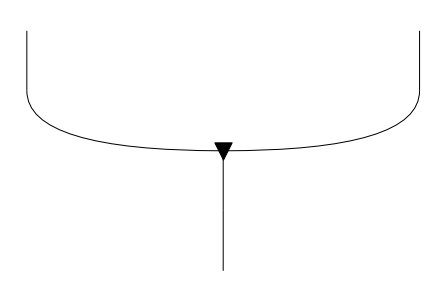

In [2]:
W(2, False).draw()

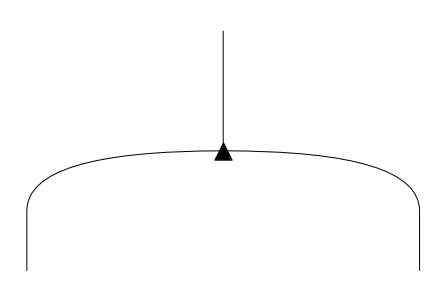

(2, 1)

In [3]:
cw = W(2, False)
w = cw.dagger()
w.draw()
len(cw.dom), len(cw.cod)

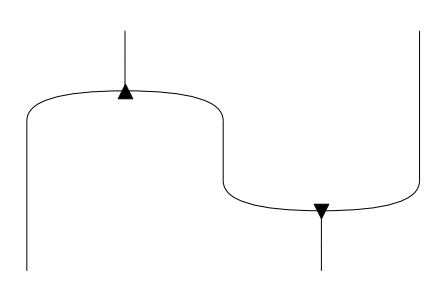

/tmp/ipykernel_80030/2938821927.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(z).astype(float)


array([[1., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [4]:
z = w @ Id(1) >> Id(1) @ cw
z.draw()
eval(z).astype(float)

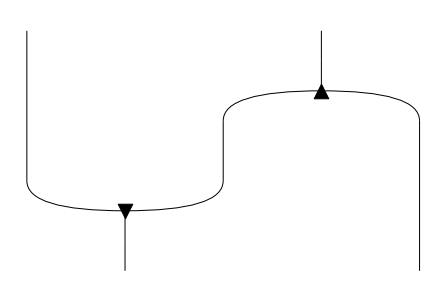

/tmp/ipykernel_80030/2604163268.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(zz).astype(float)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 1.]])

In [5]:
zz = Id(1) @ w >> cw @ Id(1)
zz.draw()
eval(zz).astype(float)

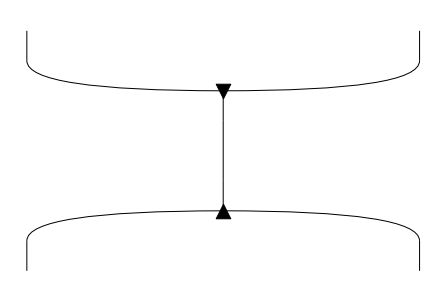

/tmp/ipykernel_80030/1493269735.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(z2).astype(float)


array([[1., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.]])

In [6]:
z2 = cw >> w
z2.draw()
eval(z2).astype(float)

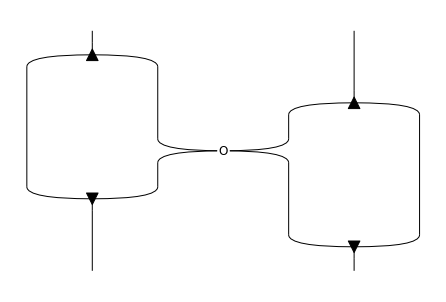

/tmp/ipykernel_80030/2781722875.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(z22).astype(float)


array([[1., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.]])

In [7]:
z22 = w @ w >> Id(1) @ FSwap @ Id(1) >> cw @ cw
z22.draw()
eval(z22).astype(float)

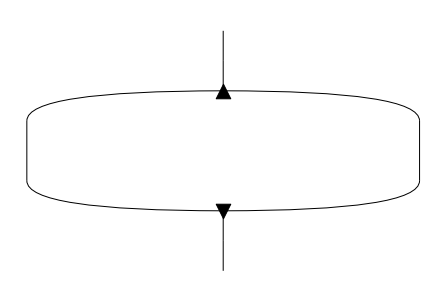

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j]])

In [8]:
d = W() >> W().dagger()
d.draw()
eval(d)

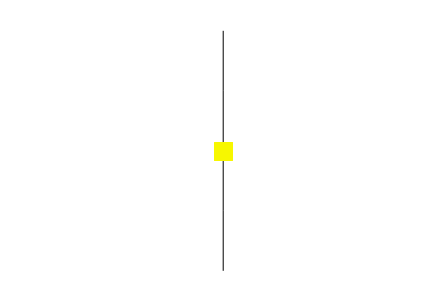

In [9]:

(H >> Id(1)).draw()

In [10]:
eval(H)

array([[ 1.+0.j,  1.+0.j],
       [ 1.+0.j, -1.+0.j]])

In [11]:
H.dom, H.cod

(PRO(1), PRO(1))

In [12]:
Id(1).dom, Id(1).cod

(PRO(1), PRO(1))

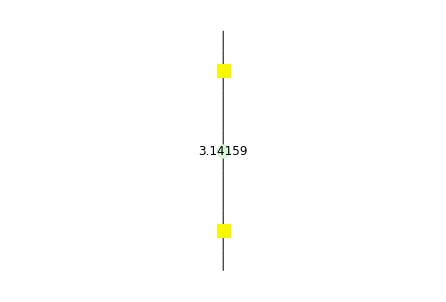

/tmp/ipykernel_80030/4160427376.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(a).astype(float)


array([[0.09731105, 1.90268895],
       [1.90268895, 0.09731105]])

In [13]:
a = H >> Z(1, 1, 3.14159) >> H
a.draw()
eval(a).astype(float)

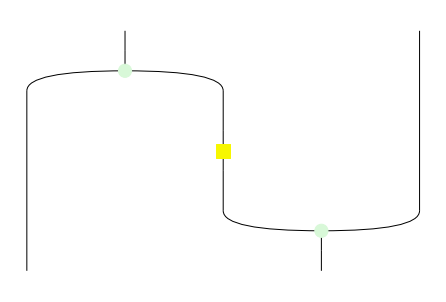

/tmp/ipykernel_80030/317242590.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(CZ).astype(float)


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -1.]])

In [14]:
CZ.draw()
eval(CZ).astype(float)

In [15]:
FSwap = Swap >> CZ
eq(FSwap, CZ >> Swap)

True

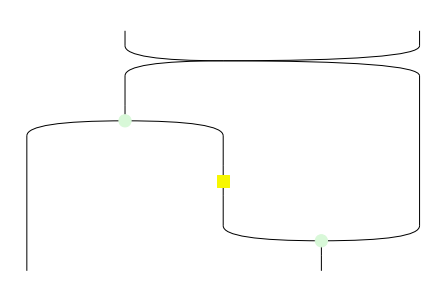

In [16]:
FSwap.draw()

In [17]:
eval(FSwap).astype(float)

/tmp/ipykernel_80030/3397302496.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(FSwap).astype(float)


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -1.]])

In [18]:
eval(FSwap >> FSwap).astype(float)

/tmp/ipykernel_80030/2122885309.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(FSwap >> FSwap).astype(float)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [19]:
eval(X(0, 1, 1)), eval(Z(0, 1, 1))

(array([[0.+0.j],
        [1.+0.j]]),
 array([[ 1.+0.0000000e+00j],
        [-1.+1.2246468e-16j]]))

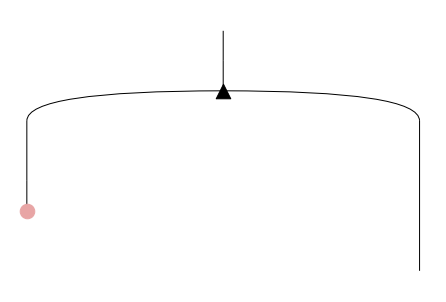

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


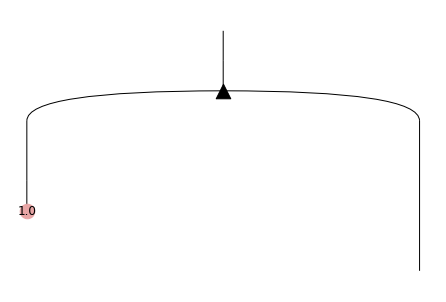

[[0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j]]


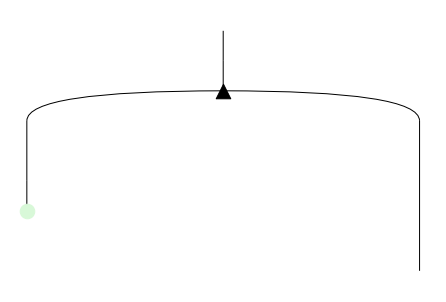

[[1.+0.j 1.+0.j]
 [0.+0.j 1.+0.j]]


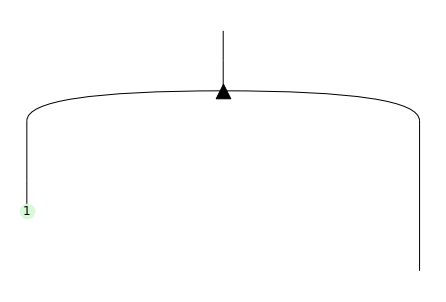

[[ 1.+0.0000000e+00j -1.+1.2246468e-16j]
 [ 0.+0.0000000e+00j  1.+0.0000000e+00j]]


In [20]:
for base in [X, Z]:
    for phase in [0, 1]:
        d = W() >> base(1, 0, phase) @ Id(1)
        d.draw()
        print(eval(d))

In [21]:
eval(X(1, 0, 1))

array([[0.+0.j, 1.+0.j]])

In [22]:
0.2 in (0, 0.5)

False

In [23]:
eval(X(1, 0, 1))

array([[0.+0.j, 1.+0.j]])